In [1]:
# python
import sys
import os
import importlib
# columnar analysis
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
#fname = '~/local_data/tta_mAlp-0p35GeV_ctau-1e3mm_part-0.root'
samples = [
    '4mu_500GeV_5GeV_0p08mm',
    #'2mu2e_500GeV_5GeV_0p08mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2")
# create events collection from single file
fname = fileset[samples[0]][0]
print(fname)
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
).events()

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD_V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAODv2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root


In [3]:
#ak.fields(events)

In [4]:
#/store/group/lpcmetx/SIDM/ULSignalSamples/2018_v3/signals/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.rootak.fields(events.Muon)

In [5]:
print(events.PV.fields)
print(events.PV.pos.rho)
print(events.PV)
print(events.PV.npvs)

['ndof', 'x', 'y', 'z', 'chi2', 'score', 'npvs', 'npvsGood']
[2.66, 0.682, 3.2, 4.04, 0.969, 1.89, 0.113, ... 4.49, 2.73, 2.28, 5.54, 3.27, 0.761]
[Vertex, Vertex, Vertex, Vertex, Vertex, ... Vertex, Vertex, Vertex, Vertex, Vertex]
[38, 34, 19, 28, 23, 23, 22, 14, 36, 7, ... 20, 40, 24, 53, 22, 22, 23, 39, 48, 14]


In [6]:
print(events.GenPart.fields)
print(events.GenPart.pdgId)
print(ak.num(events.GenPart[abs(events.GenPart.pdgId)==13]))
print(ak.num(events.GenPart[abs(events.GenPart.pdgId)==32]))
print(events.GenPart[abs(events.GenPart.pdgId)==32].children.pdgId)
print(abs(events.GenPart[abs(events.GenPart.pdgId)==32].children.pdgId) == 13)
print(abs(events.GenPart.pdgId))
print(ak.all(abs(events.GenPart[events.GenPart.pdgId==32].children.pdgId) == 13, axis=-1))
print(events.GenPart[(abs(events.GenPart.pdgId)== 32) & ak.all(abs(events.GenPart.children.pdgId) == 13, axis=-1)])

['eta', 'mass', 'phi', 'pt', 'genPartIdxMother', 'pdgId', 'status', 'statusFlags', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'genPartIdxMotherG', 'distinctParentIdxG', 'childrenIdxG', 'distinctChildrenIdxG', 'distinctChildrenDeepIdxG']
[[-4, 4, 35, 35, 32, 32, -13, 13, -13, ... -12, -11, 12, 11, -11, 11, -11, 11, -11]]
[4, 4, 6, 8, 6, 9, 4, 6, 4, 6, 6, 7, 5, 7, ... 4, 4, 4, 5, 5, 4, 6, 6, 4, 4, 7, 4, 4]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[[-13, 13], [-13, 13]], [[-13, 13], [-13, ... [-13, 13]], [[-13, 13], [-13, 13]]]
[[[True, True], [True, True]], [[True, ... True]], [[True, True], [True, True]]]
[[4, 4, 35, 35, 32, 32, 13, 13, 13, 13, ... 11, 12, 11, 12, 11, 11, 11, 11, 11, 11]]
[[True, True], [True, True], [True, True, ... True], [True, True], [True, True]]
[[GenParticle, GenParticle], [GenParticle, ... [GenParticle, GenParticle]]


In [7]:
events.Electron.fields

['dEscaleDown',
 'dEscaleUp',
 'dEsigmaDown',
 'dEsigmaUp',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'genPartIdxG',
 'jetIdxG',
 'photonIdxG']

In [8]:
events[ak.num(events.Electron)>0].Electron.vidNestedWPBitmap

<Array [[613550372], ... [612516900]] type='290 * var * int32[parameters={"__doc...'>

In [9]:
events.DSAMuon.fields

['idx',
 'pt',
 'ptErr',
 'eta',
 'etaErr',
 'phi',
 'phiErr',
 'charge',
 'dxy',
 'dz',
 'vx',
 'vy',
 'vz',
 'chi2',
 'ndof',
 'trkNumPlanes',
 'trkNumHits',
 'trkNumDTHits',
 'trkNumCSCHits',
 'normChi2',
 'outerEta',
 'outerPhi',
 'dzPV',
 'dzPVErr',
 'dxyPVTraj',
 'dxyPVTrajErr',
 'dxyPVSigned',
 'dxyPVSignedErr',
 'ip3DPVSigned',
 'ip3DPVSignedErr',
 'dxyBS',
 'dxyBSErr',
 'dzBS',
 'dzBSErr',
 'dxyBSTraj',
 'dxyBSTrajErr',
 'dxyBSSigned',
 'dxyBSSignedErr',
 'ip3DBSSigned',
 'ip3DBSSignedErr',
 'displacedID',
 'muonMatch1',
 'muonMatch1idx',
 'muonMatch2',
 'muonMatch2idx',
 'muonMatch3',
 'muonMatch3idx',
 'muonMatch4',
 'muonMatch4idx',
 'muonMatch5',
 'muonMatch5idx',
 'muonDTMatch1',
 'muonDTMatch1idx',
 'muonDTMatch2',
 'muonDTMatch2idx',
 'muonDTMatch3',
 'muonDTMatch3idx',
 'muonCSCMatch1',
 'muonCSCMatch1idx',
 'muonCSCMatch2',
 'muonCSCMatch2idx',
 'muonCSCMatch3',
 'muonCSCMatch3idx',
 'nSegments',
 'nDTSegments',
 'nCSCSegments']

In [10]:
print(events.DSAMuon.muonMatch1)
print(events.DSAMuon.nSegments)
print(ak.num(events.DSAMuon))
print(ak.num(events.DSAMuon[events.DSAMuon.muonMatch1/events.DSAMuon.nSegments < 0.667]))

[[2, 3, 2], [6, 5, 0, 7, 0, 1], [3, 0, 0, ... 2], [3, 0, 3, 4, 2], [3, 3, 2, 3, 4]]
[[2, 3, 2], [7, 5, 0, 7, 1, 1], [3, 4, 1, ... 2], [3, 4, 3, 4, 3], [3, 3, 2, 3, 4]]
[3, 6, 6, 6, 8, 4, 3, 2, 3, 4, 6, 4, 5, 4, ... 3, 4, 4, 4, 5, 3, 8, 4, 3, 5, 5, 5, 5]
[0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, ... 0, 0, 0, 0, 2, 0, 3, 0, 1, 1, 1, 2, 0]


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


In [11]:
#print(events.DSAMuon.muonMatch1[0])
print(set(ak.flatten(events.DSAMuon.muonMatch1idx)))
print(events.DSAMuon[0])
print(events.Muon[0])
print(events.Muon[ak.values_astype(events.DSAMuon.muonMatch1idx, "int64")])
a = ak.Array([[0, 1, 0], [1]])
b = ak.Array([[71, 72], [59, 58, 57]])
b[a]

{0.0, 1.0, 2.0, 3.0, 4.0}
[{idx: 0, pt: 109, ptErr: 48.2, eta: 0.848, ... nDTSegments: 2, nCSCSegments: 0}]
[Muon, Muon, Muon, Muon]
[[Muon, Muon, Muon], [Muon, Muon, Muon, ... Muon], [Muon, Muon, Muon, Muon, Muon]]


<Array [[71, 72, 71], [58]] type='2 * var * int64'>

In [12]:
print(events.DSAMuon.muonMatch1)
print(events.DSAMuon.muonMatch1idx)
print(ak.flatten(events.DSAMuon.muonMatch1idx))
#print(events.DSAMuon.outerPhi)
print(events.Muon.outerPhi)
print(events.Muon[ak.values_astype(events.DSAMuon.muonMatch1idx, "int64")].outerPhi)
utilities.dR_outer(events.DSAMuon, events.Muon[ak.values_astype(events.DSAMuon.muonMatch1idx, "int64")])

[[2, 3, 2], [6, 5, 0, 7, 0, 1], [3, 0, 0, ... 2], [3, 0, 3, 4, 2], [3, 3, 2, 3, 4]]
[[0, 1, 3], [1, 4, 4, 0, 4, 3], [2, 3, 3, ... 2], [1, 3, 2, 0, 3], [0, 3, 3, 1, 2]]
[0, 1, 3, 1, 4, 4, 0, 4, 3, 2, 3, 3, 1, 0, ... 0, 1, 2, 1, 3, 2, 0, 3, 0, 3, 3, 1, 2]
[[0.181, -2.98, 0.172, -2.97], [1.3, -1.83, ... 1.92], [-0.29, 2.95, 3.08, 0.216]]
[[0.181, -2.98, -2.97], [-1.83, 1.47, 1.47, ... [-0.29, 0.216, 0.216, 2.95, 3.08]]


<Array [[0.000255, 0.000276, ... 0.0023]] type='2004 * var * float32'>

In [13]:
#from coffea.nanoevents.schemas.base import zip_forms
from coffea.nanoevents.methods import vector as cvec
from coffea.nanoevents.methods import nanoaod
#print(events.Muon)
#print([events.DSAMuon[x] for x in ["pt", "eta"]])
print(events.DSAMuon)
forms = {f : events.DSAMuon[f] for f in events.DSAMuon.fields}
events.DSAMuon = ak.zip(forms, with_name="Muon", behavior=nanoaod.behavior)
print(events.DSAMuon)
print(events.DSAMuon.nearest(events.Muon))

[[{idx: 0, pt: 109, ptErr: 48.2, eta: 0.848, ... nDTSegments: 4, nCSCSegments: 0}]]
[[Muon, Muon, Muon], [Muon, Muon, Muon, ... Muon], [Muon, Muon, Muon, Muon, Muon]]
[[Muon, Muon, Muon], [Muon, Muon, Muon, ... Muon], [Muon, Muon, Muon, Muon, Muon]]


In [14]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"barrelE_ID-DPhiIn",
    ],
    ["base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel baseNoLj

Applying cut:  PV filter

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [15]:
hists = out[samples[0]]["hists"]

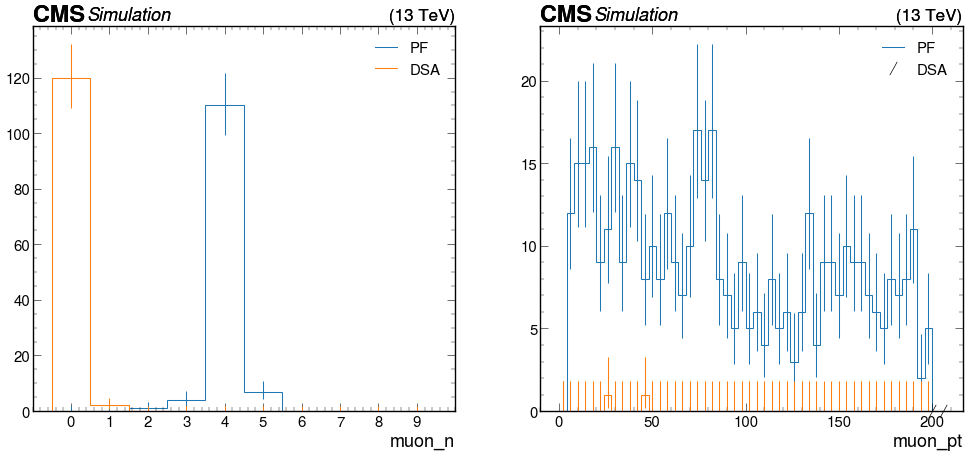

In [16]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(hists["muon_n"]["baseNoLj", :])
utilities.plot(hists["dsaMuon_n"]["baseNoLj", :])
plt.legend(["PF", "DSA"])
plt.subplot(1, 2, 2)
utilities.plot(hists["muon_pt"]["baseNoLj", ::2j])
utilities.plot(hists["dsaMuon_pt"]["baseNoLj", ::2j])
plt.legend(["PF", "DSA"])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcb5f0cbb80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

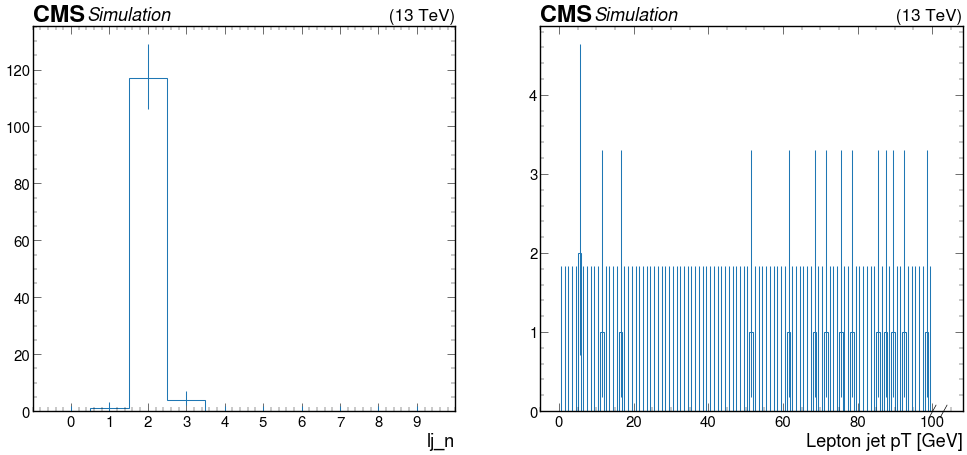

In [17]:
plt.subplots(1, 2, figsize=(24, 10))
plt.subplot(1, 2, 1)
utilities.plot(hists["lj_n"]["baseNoLj", :])
plt.subplot(1, 2, 2)
utilities.plot(hists["lj_pt"]["baseNoLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcb5e7732e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

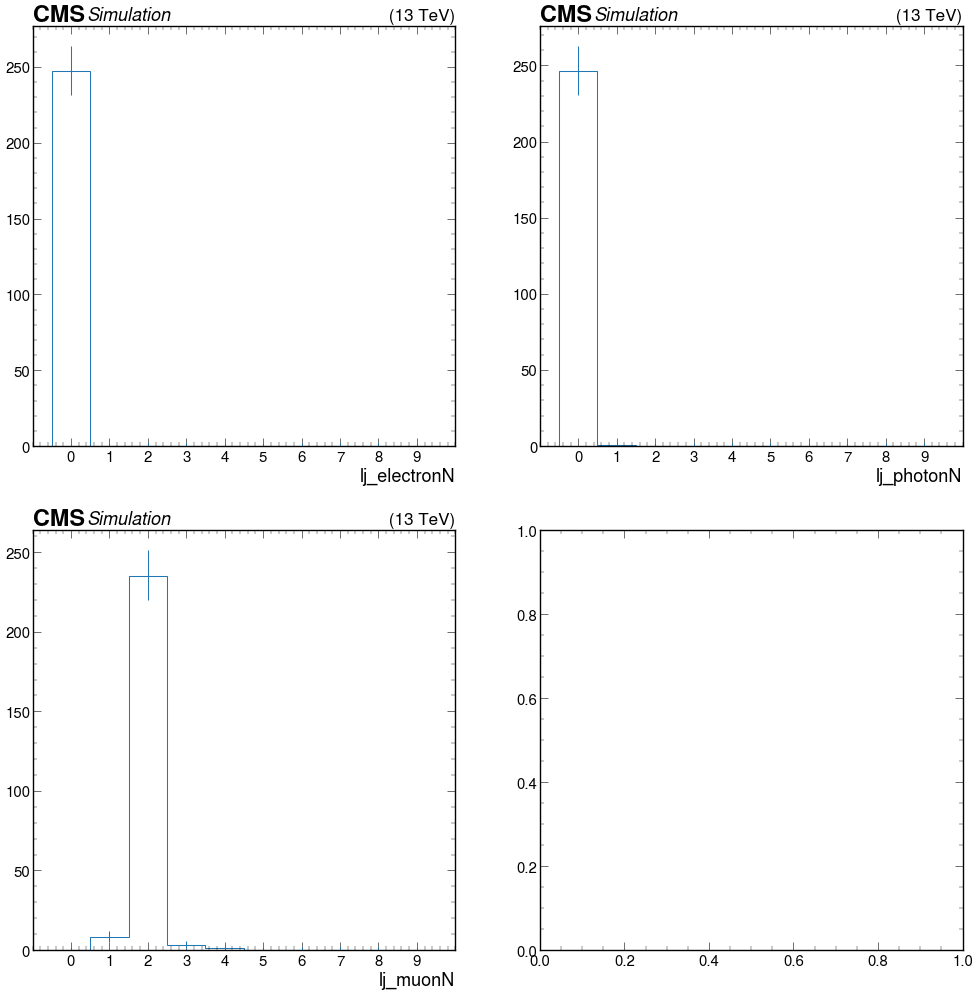

In [18]:
plt.subplots(2, 2, figsize=(24, 24))
plt.subplot(2, 2, 1)
utilities.plot(hists["lj_electronN"]["baseNoLj", :])
plt.subplot(2, 2, 2)
utilities.plot(hists["lj_photonN"]["baseNoLj", :])
plt.subplot(2, 2, 3)
utilities.plot(hists["lj_muonN"]["baseNoLj", :])
#plt.subplot(2, 2, 4)
#utilities.plot(hists["lj_dsaMuonN"]["llpnano", :])